<a href="https://colab.research.google.com/github/bradykuo/Lung-Cancer-Prediction/blob/main/Lung_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 匯入資源包
import sklearn
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pickle

In [3]:
# 讀取資料集
train_df = pd.read_csv('/content/drive/MyDrive/程式專案/機器學習導論與實作/term_project/survey lung cancer.csv')
# 預覽資料前三筆
train_df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


In [4]:
# 輸出訓練資料型態與大小
train_df.info()
# 輸出訓練資料統計資訊
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
# 資料分析
train_x = train_df[['YELLOW_FINGERS','ANXIETY', 'FATIGUE ', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH',
          'SWALLOWING DIFFICULTY', 'CHEST PAIN']]     # 取出訓練資料需要分析的資料欄位

train_y = train_df['LUNG_CANCER']

# 數值型態資料前處理
from sklearn.preprocessing import StandardScaler # 匯入標準化的工具


# 類別型態資料前處理
# 匯入 Label Encoder
from sklearn.preprocessing import LabelEncoder

# 創造 Label Encoder
la = LabelEncoder()
# 給予 train_y 類別一個數值
la.fit(train_y)
# 轉換 train_y 類別成為數值
train_y = la.transform(train_y)

# 繪製圖表
### 包含有無罹患肺癌的比例、以及各個特徵的分布長條圖

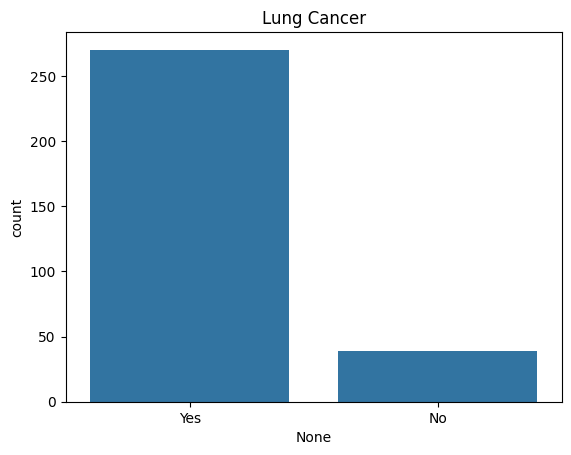

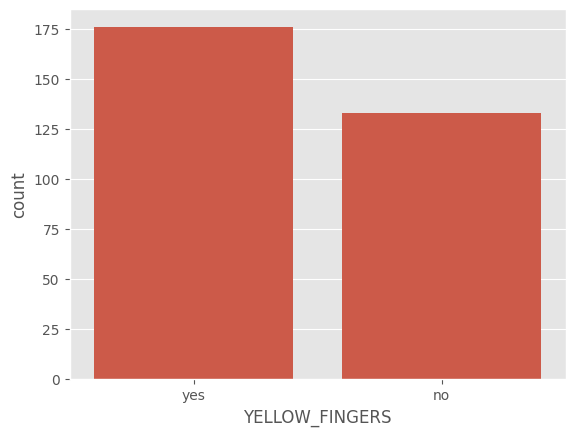

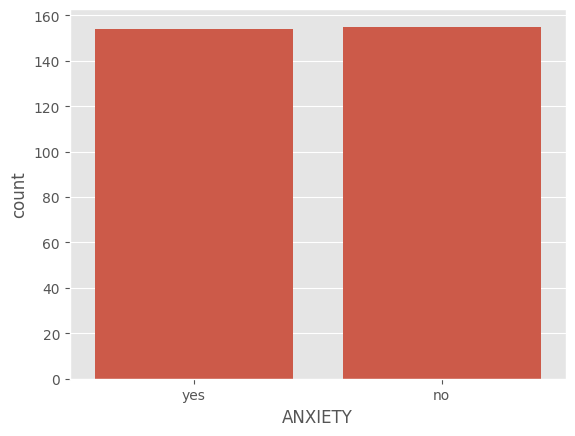

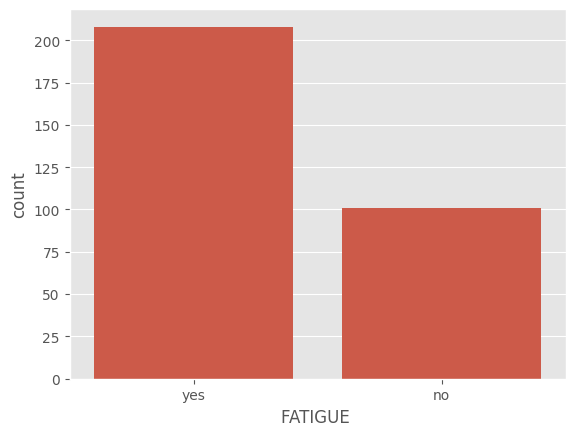

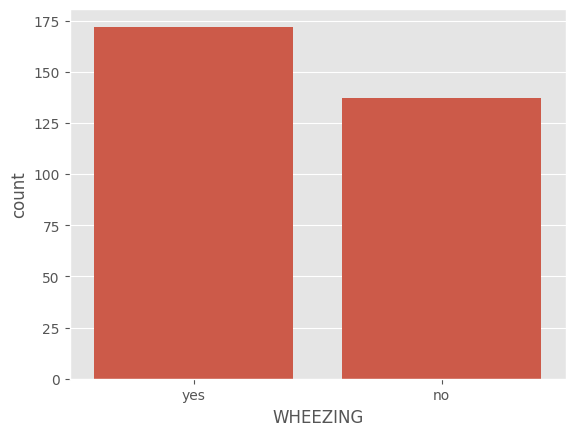

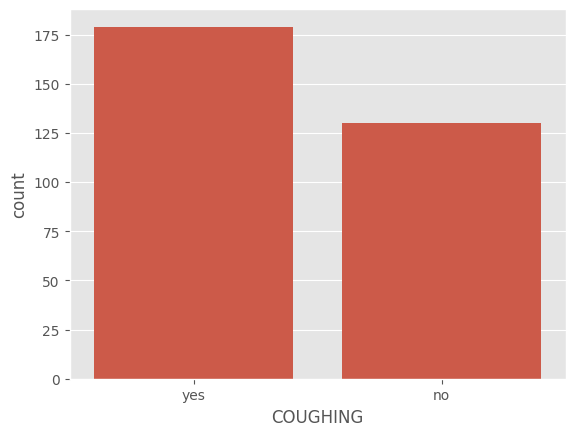

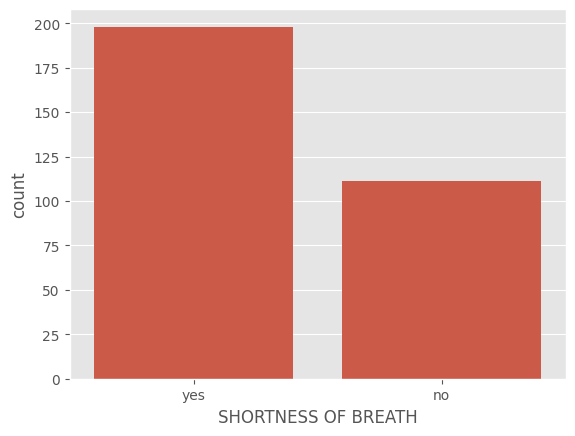

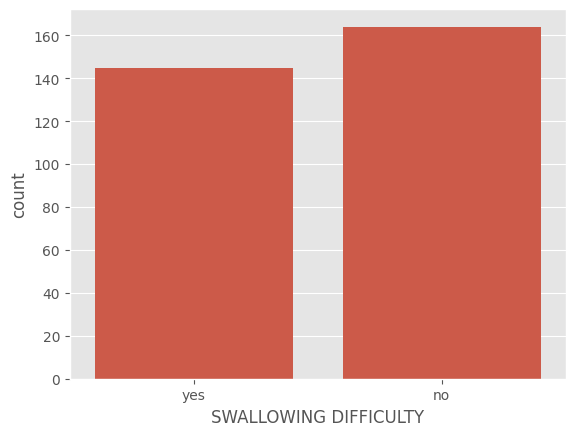

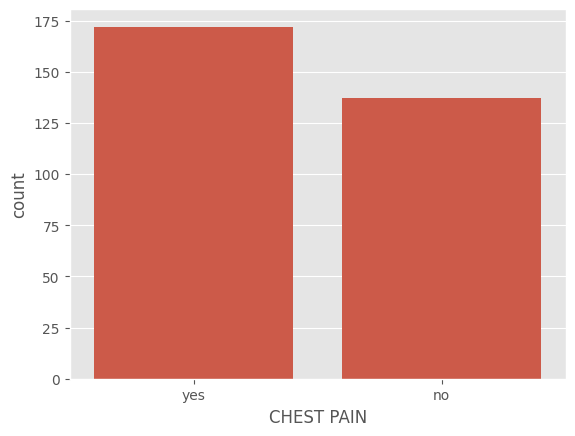

In [6]:
# 繪製肺癌診斷結果的分布圖
# 將目標變數 train_y 中的 0,1 替換為 'No','Yes'
# 使用 countplot 來顯示肺癌陽性和陰性案例的數量分布
sns.countplot(x = pd.Series(train_y).replace([0,1],['No','Yes']))
plt.title('Lung Cancer')
plt.show()

# 繪製各症狀的分布圖
# 定義要分析的症狀列表
symptoms = [ 'YELLOW_FINGERS', 'ANXIETY', 'FATIGUE ',  'WHEEZING',
            'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY',
            'CHEST PAIN']

# 定義對應關係：2表示'yes', 1表示'no'
key = {2: 'yes', 1: 'no'}

# 設定繪圖風格為'ggplot'
plt.style.use('ggplot')

# 對每個症狀進行循環，繪製其分布圖
for sys in symptoms:
    # 將每個症狀的 1,2 值替換為 'no','yes' 並繪製計數圖
    sns.countplot(x = train_x[sys].replace(key))
    plt.show()


# Decision Tree
### 透過training data的fearture，學習一系列的問題，然後來推斷其分類。一開始會先從根節點（父節點）開始，然後依據各個feature將資料以最具意義的特徵來做分割到左右兩邊。

In [7]:
# 匯入決策樹模型
from sklearn.tree import DecisionTreeClassifier
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# 創造決策樹模型
# 設定最佳化方法為 Gini Index
# 設定最大深度為 2
# 設定最多葉子個數為 4
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    max_leaf_nodes=2 ** 4
)
# 訓練決策樹模型
model.fit(train_x, train_y)

# 確認模型是否訓練成功
pred_y = model.predict(train_x)
# 計算準確度
acc = accuracy_score(train_y, pred_y)
f1 = f1_score(train_y, pred_y)

# 輸出結果
print('accuracy: {}'.format(acc))
print('F-score: {}'.format(f1))

# 紀錄 f1 score
f1_list = []
f1_list.append(f1)

accuracy: 0.9029126213592233
F-score: 0.9454545454545454


In [8]:
# 交叉驗證

SEED=1024
np.random.seed(SEED)                      #固定隨機變數，確保每次結果一樣

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具

kf = KFold(n_splits=5,                                # 設定 K 值
      random_state=SEED,
      shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y[train_index]              # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y[valid_index]              # 產生驗證資料標籤

    model = DecisionTreeClassifier(
    random_state=SEED,
    criterion='gini',                      # 設定模型超參數
    max_depth=2,
    max_leaf_nodes=2 ** 2
    )                                                 # 創造決策樹模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型

    train_pred_y = model.predict(train_x_split)                    # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split, train_pred_y)        # 計算訓練資料準確度
    valid_pred_y = model.predict(valid_x_split)                    # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split, valid_pred_y)        # 計算驗證資料準確度

    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    'average valid accuracy: {}\n' ).format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
))
print((
    'max train accuracy: {}\n' +
    'max valid accuracy: {}\n' ).format(
    np.max(train_acc_list),                          # 輸出最大訓練準確度
    np.max(valid_acc_list),                          # 輸出最大驗證準確度
))
print((
    'min train accuracy: {}\n' +
    'min valid accuracy: {}\n' ).format(
    np.min(train_acc_list),                          # 輸出最小訓練準確度
    np.min(valid_acc_list),                          # 輸出最小驗證準確度
))


average train accuracy: 0.8737756301423534
average valid accuracy: 0.8736118455843469

max train accuracy: 0.8870967741935484
max valid accuracy: 0.9354838709677419

min train accuracy: 0.8582995951417004
min valid accuracy: 0.819672131147541



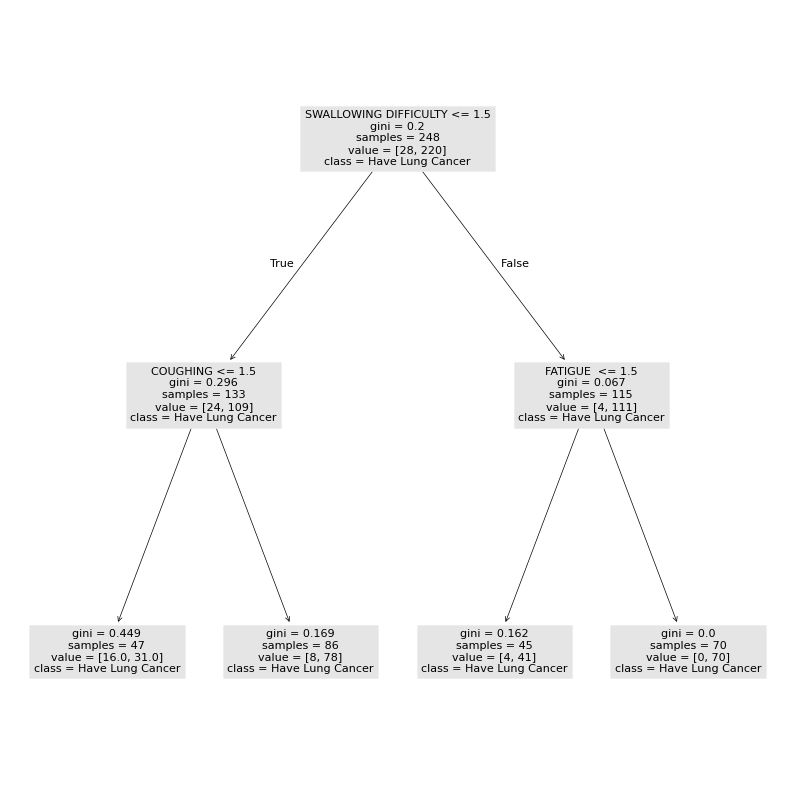

In [9]:
# 匯入決策樹繪圖工具
from sklearn.tree import plot_tree

# 創造繪圖環境
fig, ax = plt.subplots(figsize=(10, 10))

# 繪製訓練後的模型
plot_tree(model, ax=ax,
    feature_names=['YELLOW_FINGERS','ANXIETY', 'FATIGUE ', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH',
          'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
    class_names=['Not Have Lung Cancer', 'Have Lung Cancer'] )

# 繪製圖表
plt.show()


# Random Forest
### 是 Bagging 的擴充套件變體，藉由多棵不同決策樹的概念所組成，讓結果比較不容易過度擬合，並使得預測能力更提升，而且在決策樹的訓練過程中引入了隨機特徵選擇（節點），優點為易於並行化，在大資料集上有很大的優勢；能夠處理高維度資料，不用做特徵選擇。



In [10]:
# 匯入隨機森林模型
from sklearn.ensemble import RandomForestClassifier

# 匯入準確度計算工具
from sklearn.metrics import accuracy_score
# 創造隨機森林模型
model = RandomForestClassifier(random_state=1024)
# 訓練隨機森林模型
model.fit(train_x, train_y)
# 確認模型是否訓練成功
pred_y = model.predict(train_x)
# 計算準確度、fl score
acc = accuracy_score(train_y, pred_y)
f1 = f1_score(train_y, pred_y)

# 輸出結果
print('accuracy: {}'.format(acc))
print('F-score: {}'.format(f1))

# 紀錄 f1 score
f1_list.append(f1)

accuracy: 0.9449838187702265
F-score: 0.9689213893967094


In [11]:
# 交叉驗證

# 匯入 K 次交叉驗證工具

from sklearn.model_selection import KFold

# 設定 K 值

kf = KFold(n_splits=5, random_state=1012, shuffle=True)

# 給予資料範圍

kf.get_n_splits(train_x)

# 每個迴圈都會產生不同部份的資料

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y[valid_index]         # 產生驗證資料標籤

# 使用隨機森林模型

model = RandomForestClassifier(random_state=1024)

model.fit(train_x_split, train_y_split)

train_pred_y = model.predict(train_x_split)                    # 確認模型是否訓練成功
train_acc = accuracy_score(train_y_split, train_pred_y)        # 計算訓練資料準確度
valid_pred_y = model.predict(valid_x_split)                    # 驗證模型是否訓練成功
valid_acc = accuracy_score(valid_y_split, valid_pred_y)        # 計算驗證資料準確度

train_acc_list.append(train_acc)
valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    'average valid accuracy: {}\n' ).format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
))
print((
    'max train accuracy: {}\n' +
    'max valid accuracy: {}\n' ).format(
    np.max(train_acc_list),                          # 輸出最大訓練準確度
    np.max(valid_acc_list),                          # 輸出最大驗證準確度
))
print((
    'min train accuracy: {}\n' +
    'min valid accuracy: {}\n' ).format(
    np.min(train_acc_list),                          # 輸出最小訓練準確度
    np.min(valid_acc_list),                          # 輸出最小驗證準確度
))

average train accuracy: 0.9475806451612904
average valid accuracy: 0.9344262295081968

max train accuracy: 0.9475806451612904
max valid accuracy: 0.9344262295081968

min train accuracy: 0.9475806451612904
min valid accuracy: 0.9344262295081968



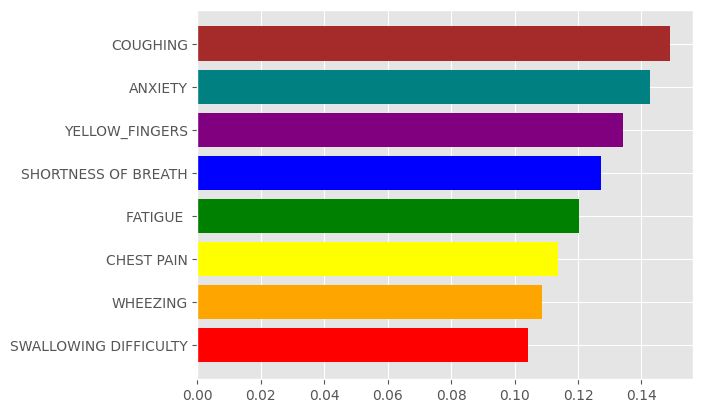

In [12]:
# 匯入計算 feature 重要程度的工具
from sklearn.inspection import permutation_importance

# 計算重要程度
result = permutation_importance(model, train_x, train_y, random_state=1012)
# 排序
perm_sorted_idx = result.importances_mean.argsort()
tree_importance_sorted_idx = np.argsort(model.feature_importances_)
tree_indices = np.arange(0, len(model.feature_importances_)) + 0.5

# 繪圖
plt.barh(tree_indices,
         model.feature_importances_[tree_importance_sorted_idx],
         tick_label = train_x.columns[tree_importance_sorted_idx],
         color = ['red','orange','yellow','green','blue','purple','teal','brown']
         )
plt.style.use('ggplot')
plt.show()

The accuracy score of this Random Forest Classifier model is: 93.4%


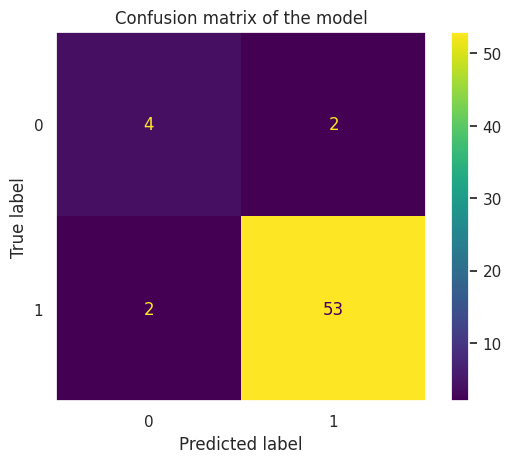

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

model =  RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(train_x_split, train_y_split)
y_pred = model.predict(valid_x_split)
print('The accuracy score of this Random Forest Classifier model is: {0:.1f}%'.format(100*accuracy_score(valid_y_split, y_pred)))

sns.set(rc = {'axes.grid':False})
ConfusionMatrixDisplay.from_predictions(valid_y_split, y_pred)
plt.title('Confusion matrix of the model')
plt.show()


# SVM
### 支援向量機是一種兩類分類模型，其基本模型定義為特徵空間上的間隔最大的線性分類器，其學習策略（分割原則）便是間隔最大化，最終可轉換為一個凸二次規劃問題的求解。

In [14]:
# 匯入支援向量機模型

from sklearn.svm import SVC

# 匯入準確度計算工具

from sklearn.metrics import accuracy_score
# 創造支援向量機模型
model = SVC(random_state=1012)
# 訓練支援向量機模型
model.fit(train_x, train_y)
# 確認模型是否訓練成功
pred_y = model.predict(train_x)
# 計算準確度、fl score
acc = accuracy_score(train_y, pred_y)
f1 = f1_score(train_y, pred_y)

# 輸出結果
print('accuracy: {}'.format(acc))
print('F-score: {}'.format(f1))

# 紀錄 f1 score
f1_list.append(f1)

accuracy: 0.9158576051779935
F-score: 0.9525547445255474


In [15]:
# 交叉驗證

# 匯入 K 次交叉驗證工具

from sklearn.model_selection import KFold

# 設定 K 值

kf = KFold(n_splits=5, random_state=1012, shuffle=True)

# 給予資料範圍

kf.get_n_splits(train_x)

# 每個迴圈都會產生不同部份的資料

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y[valid_index]         # 產生驗證資料標籤

# 使用支援向量機模型

model = SVC(random_state=1012)

model.fit(train_x_split, train_y_split)

train_pred_y = model.predict(train_x_split)                    # 確認模型是否訓練成功
train_acc = accuracy_score(train_y_split, train_pred_y)        # 計算訓練資料準確度
valid_pred_y = model.predict(valid_x_split)                    # 驗證模型是否訓練成功
valid_acc = accuracy_score(valid_y_split, valid_pred_y)        # 計算驗證資料準確度

train_acc_list.append(train_acc)
valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    'average valid accuracy: {}\n' ).format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
))
print((
    'max train accuracy: {}\n' +
    'max valid accuracy: {}\n' ).format(
    np.max(train_acc_list),                          # 輸出最大訓練準確度
    np.max(valid_acc_list),                          # 輸出最大驗證準確度
))
print((
    'min train accuracy: {}\n' +
    'min valid accuracy: {}\n' ).format(
    np.min(train_acc_list),                          # 輸出最小訓練準確度
    np.min(valid_acc_list),                          # 輸出最小驗證準確度
))

average train accuracy: 0.907258064516129
average valid accuracy: 0.8852459016393442

max train accuracy: 0.907258064516129
max valid accuracy: 0.8852459016393442

min train accuracy: 0.907258064516129
min valid accuracy: 0.8852459016393442



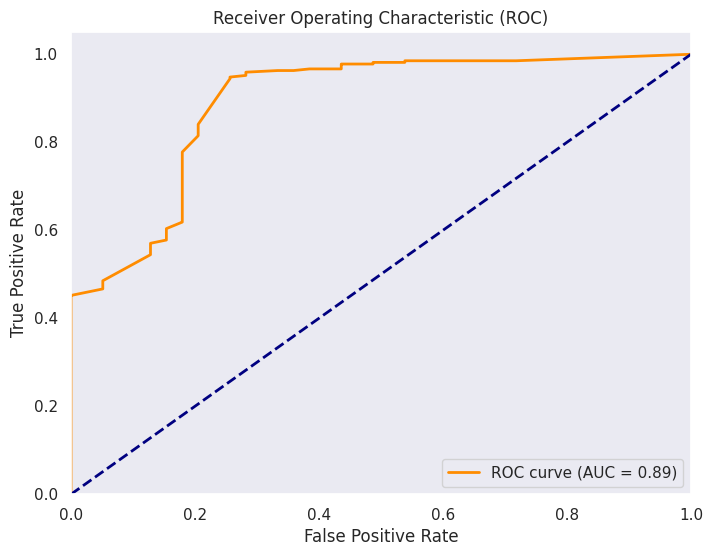

交叉驗證 AUC 分數:
平均 AUC: 0.855
標準差: 0.065
最大 AUC: 0.914
最小 AUC: 0.743


In [16]:
# ROC 曲線和 AUC 評估
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 設定模型
model = SVC(random_state=1012, probability=True)
model.fit(train_x, train_y)

# 計算預測機率
y_pred_proba = model.predict_proba(train_x)[:,1]

# 計算 ROC 曲線參數
fpr, tpr, thresholds = roc_curve(train_y, y_pred_proba)
roc_auc = auc(fpr, tpr)

# 繪製 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 交叉驗證的 AUC 評估
auc_scores = []
for train_index, valid_index in kf.split(train_x):
    X_train, X_valid = train_x.iloc[train_index], train_x.iloc[valid_index]
    y_train, y_valid = train_y[train_index], train_y[valid_index]

    model = SVC(random_state=1012, probability=True)
    model.fit(X_train, y_train)
    y_valid_prob = model.predict_proba(X_valid)[:,1]

    fpr, tpr, _ = roc_curve(y_valid, y_valid_prob)
    auc_score = auc(fpr, tpr)
    auc_scores.append(auc_score)

print('交叉驗證 AUC 分數:')
print('平均 AUC: {:.3f}'.format(np.mean(auc_scores)))
print('標準差: {:.3f}'.format(np.std(auc_scores)))
print('最大 AUC: {:.3f}'.format(np.max(auc_scores)))
print('最小 AUC: {:.3f}'.format(np.min(auc_scores)))

# KNN
### 顧名思義就是 k 個最接近你的鄰居。分類的標準是由鄰居「多數表決」決定的。在 sklearn 中 KNN 可以用作分類或迴歸的模型。


In [17]:
# 匯入近鄰演算法模型
from sklearn.neighbors import KNeighborsClassifier

# 匯入準確度計算工具
from sklearn.metrics import accuracy_score
# 創造近鄰演算法模型
model = KNeighborsClassifier(n_neighbors=3)
# 訓練近鄰演算法模型
model.fit(train_x, train_y)
# 確認模型是否訓練成功
pred_y = model.predict(train_x)
# 計算準確度、fl score
acc = accuracy_score(train_y, pred_y)
f1 = f1_score(train_y, pred_y)

# 輸出結果
print('accuracy: {}'.format(acc))
print('F-score: {}'.format(f1))

# 紀錄 f1 score
f1_list.append(f1)

accuracy: 0.9288025889967637
F-score: 0.9597069597069597


In [18]:
# 交叉驗證

# 匯入 K 次交叉驗證工具

from sklearn.model_selection import KFold

# 設定 K 值

kf = KFold(n_splits=5, random_state=1012, shuffle=True)

# 給予資料範圍

kf.get_n_splits(train_x)

# 每個迴圈都會產生不同部份的資料

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y[valid_index]         # 產生驗證資料標籤

# 使用近鄰演算法模型

model = KNeighborsClassifier(n_neighbors=3)

model.fit(train_x_split, train_y_split)

train_pred_y = model.predict(train_x_split)                    # 確認模型是否訓練成功
train_acc = accuracy_score(train_y_split, train_pred_y)        # 計算訓練資料準確度
valid_pred_y = model.predict(valid_x_split)                    # 驗證模型是否訓練成功
valid_acc = accuracy_score(valid_y_split, valid_pred_y)        # 計算驗證資料準確度

train_acc_list.append(train_acc)
valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    'average valid accuracy: {}\n' ).format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
))
print((
    'max train accuracy: {}\n' +
    'max valid accuracy: {}\n' ).format(
    np.max(train_acc_list),                          # 輸出最大訓練準確度
    np.max(valid_acc_list),                          # 輸出最大驗證準確度
))
print((
    'min train accuracy: {}\n' +
    'min valid accuracy: {}\n' ).format(
    np.min(train_acc_list),                          # 輸出最小訓練準確度
    np.min(valid_acc_list),                          # 輸出最小驗證準確度
))

average train accuracy: 0.9395161290322581
average valid accuracy: 0.9344262295081968

max train accuracy: 0.9395161290322581
max valid accuracy: 0.9344262295081968

min train accuracy: 0.9395161290322581
min valid accuracy: 0.9344262295081968



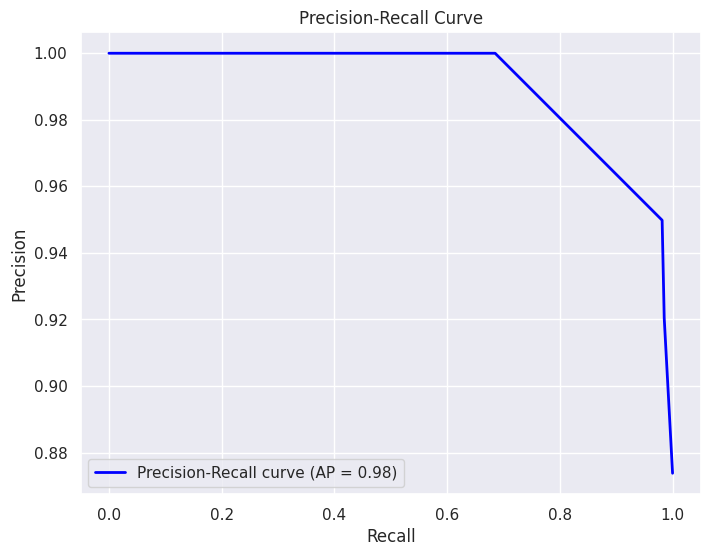

交叉驗證 Average Precision 分數:
平均 AP: 0.950
標準差: 0.027
最大 AP: 0.985
最小 AP: 0.913


In [19]:
# Precision-Recall 曲線評估
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 獲取預測機率
y_pred_proba = model.predict_proba(train_x)[:,1]

# 計算 precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(train_y, y_pred_proba)

# 計算平均 precision score
avg_precision = average_precision_score(train_y, y_pred_proba)

# 繪製 Precision-Recall 曲線
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2,
         label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# 交叉驗證的 PR 曲線評估
pr_scores = []
for train_index, valid_index in kf.split(train_x):
    X_train, X_valid = train_x.iloc[train_index], train_x.iloc[valid_index]
    y_train, y_valid = train_y[train_index], train_y[valid_index]

    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    y_valid_prob = model.predict_proba(X_valid)[:,1]

    avg_prec = average_precision_score(y_valid, y_valid_prob)
    pr_scores.append(avg_prec)

print('交叉驗證 Average Precision 分數:')
print('平均 AP: {:.3f}'.format(np.mean(pr_scores)))
print('標準差: {:.3f}'.format(np.std(pr_scores)))
print('最大 AP: {:.3f}'.format(np.max(pr_scores)))
print('最小 AP: {:.3f}'.format(np.min(pr_scores)))

# Logistic Regression
### 為迴歸分析的一種，利用現有的資料點，盡可能的找出能將所有資料點分離的那條線，但與一般線性迴歸的因變項(Y)須為連續型變數不同，Logistic Regression 的因變項(Y)是類別變數。


In [20]:
# 匯入邏輯迴歸模型
from sklearn.linear_model import LogisticRegression

# 匯入準確度計算工具
from sklearn.metrics import accuracy_score
# 創造邏輯迴歸模型
model = LogisticRegression(random_state=1024)
# 訓練邏輯迴歸模型
model.fit(train_x, train_y)
# 確認模型是否訓練成功
pred_y = model.predict(train_x)
# 計算準確度、fl score
acc = accuracy_score(train_y, pred_y)
f1 = f1_score(train_y, pred_y)

# 輸出準確度
print('accuracy: {}'.format(acc))
print('F-score: {}'.format(f1))

# 紀錄 f1 score
f1_list.append(f1)

accuracy: 0.9029126213592233
F-score: 0.9458483754512635


In [21]:
# 交叉驗證

# 匯入 K 次交叉驗證工具

from sklearn.model_selection import KFold

# 設定 K 值

kf = KFold(n_splits=5, random_state=1012, shuffle=True)

# 給予資料範圍

kf.get_n_splits(train_x)

# 每個迴圈都會產生不同部份的資料

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y[valid_index]         # 產生驗證資料標籤

# 使用邏輯迴歸模型

model = LogisticRegression(random_state=1024)

model.fit(train_x_split, train_y_split)

train_pred_y = model.predict(train_x_split)                    # 確認模型是否訓練成功
train_acc = accuracy_score(train_y_split, train_pred_y)        # 計算訓練資料準確度
valid_pred_y = model.predict(valid_x_split)                    # 驗證模型是否訓練成功
valid_acc = accuracy_score(valid_y_split, valid_pred_y)        # 計算驗證資料準確度

train_acc_list.append(train_acc)
valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    'average valid accuracy: {}\n' ).format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
))
print((
    'max train accuracy: {}\n' +
    'max valid accuracy: {}\n' ).format(
    np.max(train_acc_list),                          # 輸出最大訓練準確度
    np.max(valid_acc_list),                          # 輸出最大驗證準確度
))
print((
    'min train accuracy: {}\n' +
    'min valid accuracy: {}\n' ).format(
    np.min(train_acc_list),                          # 輸出最小訓練準確度
    np.min(valid_acc_list),                          # 輸出最小驗證準確度
))

average train accuracy: 0.9032258064516129
average valid accuracy: 0.8852459016393442

max train accuracy: 0.9032258064516129
max valid accuracy: 0.8852459016393442

min train accuracy: 0.9032258064516129
min valid accuracy: 0.8852459016393442



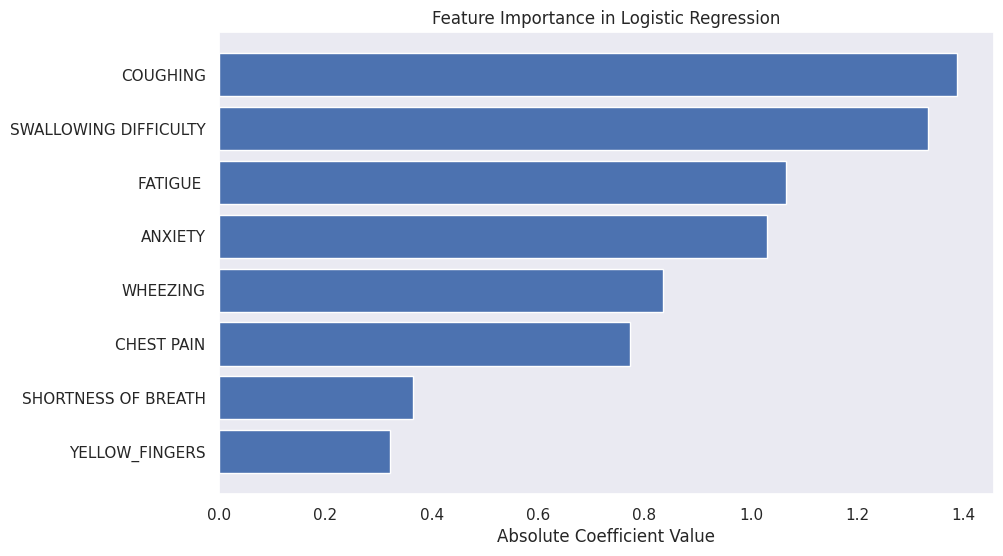

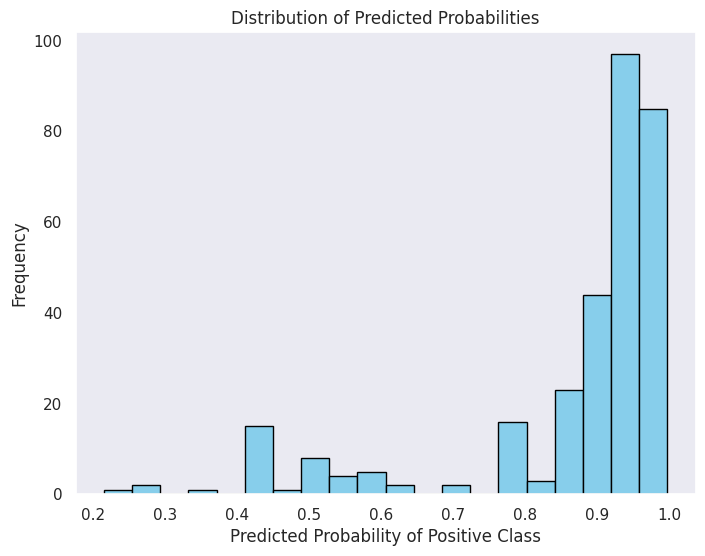

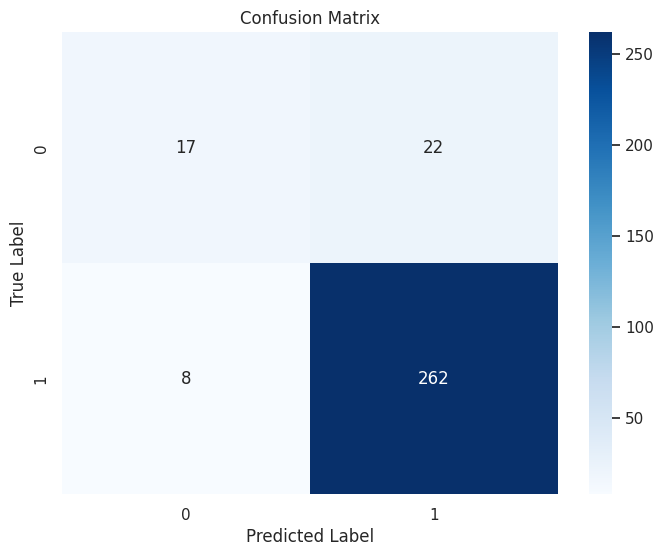

In [22]:
# 特徵係數視覺化 (Feature Coefficients)
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({'Feature': train_x.columns,
                                 'Coefficient': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('Coefficient', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.show()

# 預測機率分布
plt.figure(figsize=(8, 6))
pred_proba = model.predict_proba(train_x)[:, 1]
plt.hist(pred_proba, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Frequency')
plt.show()

# 混淆矩陣熱圖
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(train_y, pred_y)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Adaptive Boosting
### 前一個基本分類器分錯的樣本會得到加強，加權後的全體樣本再次被用來訓練下一個基本分類器。同時，在每一輪中加入一個新的弱分類器，直到達到某個預定的足夠小的錯誤率或達到預先指定的最大疊代次數。優點為能把多個不同的決策樹用一種非隨機的方式組合起來，大幅提升準確率，且幾乎不會Overfitting


In [23]:
# 匯入 AdaBoost 模型
from sklearn.ensemble import AdaBoostClassifier
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score
# 創造隨機 AdaBoost
model = AdaBoostClassifier(random_state=1024)
# 訓練隨機 AdaBoost
model.fit(train_x, train_y)
# 確認模型是否訓練成功
pred_y = model.predict(train_x)
# 計算準確度、fl score
acc = accuracy_score(train_y, pred_y)
f1 = f1_score(train_y, pred_y)

# 輸出結果
print('accuracy: {}'.format(acc))
print('F-score: {}'.format(f1))

# 紀錄 f1 score
f1_list.append(f1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy: 0.8932038834951457
F-score: 0.9396709323583181


In [24]:
# 交叉驗證

# 匯入 K 次交叉驗證工具

from sklearn.model_selection import KFold

# 設定 K 值

kf = KFold(n_splits=5, random_state=1012, shuffle=True)

# 給予資料範圍

kf.get_n_splits(train_x)

# 每個迴圈都會產生不同部份的資料

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y[valid_index]         # 產生驗證資料標籤

# 使用 AdaBoost 模型

model = AdaBoostClassifier(random_state=1024)

model.fit(train_x_split, train_y_split)

train_pred_y = model.predict(train_x_split)                    # 確認模型是否訓練成功
train_acc = accuracy_score(train_y_split, train_pred_y)        # 計算訓練資料準確度
valid_pred_y = model.predict(valid_x_split)                    # 驗證模型是否訓練成功
valid_acc = accuracy_score(valid_y_split, valid_pred_y)        # 計算驗證資料準確度

train_acc_list.append(train_acc)
valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    'average valid accuracy: {}\n' ).format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
))
print((
    'max train accuracy: {}\n' +
    'max valid accuracy: {}\n' ).format(
    np.max(train_acc_list),                          # 輸出最大訓練準確度
    np.max(valid_acc_list),                          # 輸出最大驗證準確度
))
print((
    'min train accuracy: {}\n' +
    'min valid accuracy: {}\n' ).format(
    np.min(train_acc_list),                          # 輸出最小訓練準確度
    np.min(valid_acc_list),                          # 輸出最小驗證準確度
))

average train accuracy: 0.8870967741935484
average valid accuracy: 0.9016393442622951

max train accuracy: 0.8870967741935484
max valid accuracy: 0.9016393442622951

min train accuracy: 0.8870967741935484
min valid accuracy: 0.9016393442622951



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


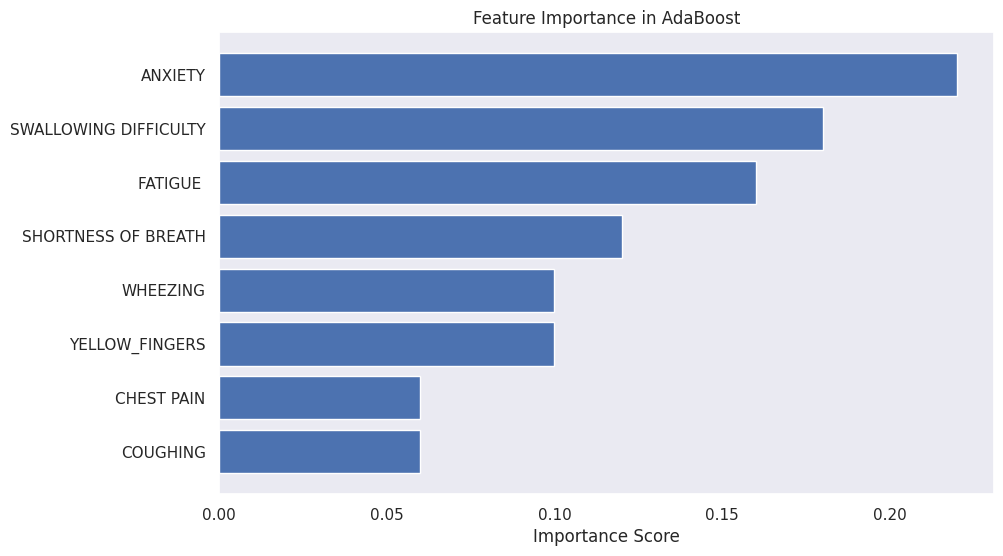

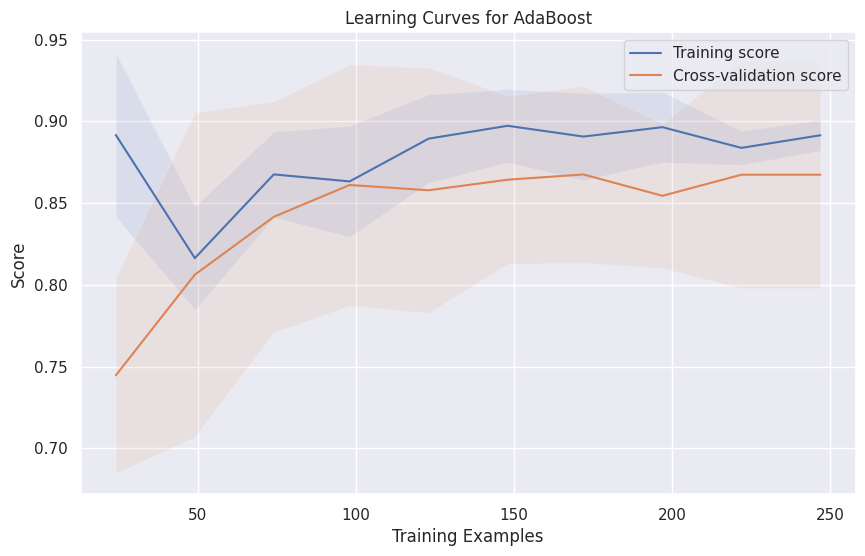

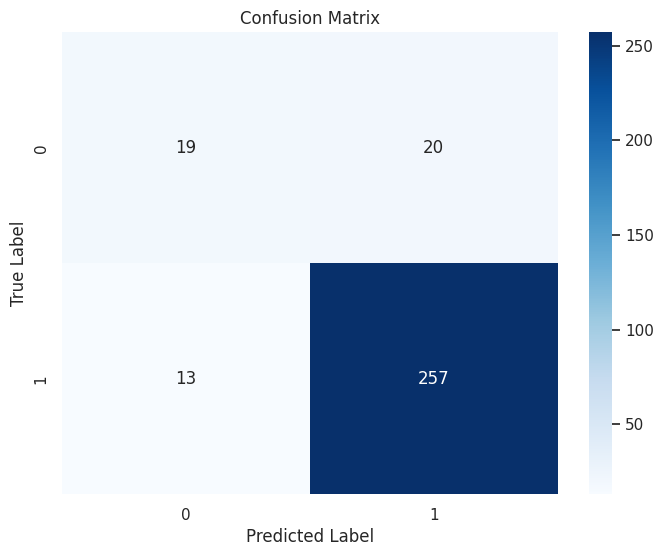

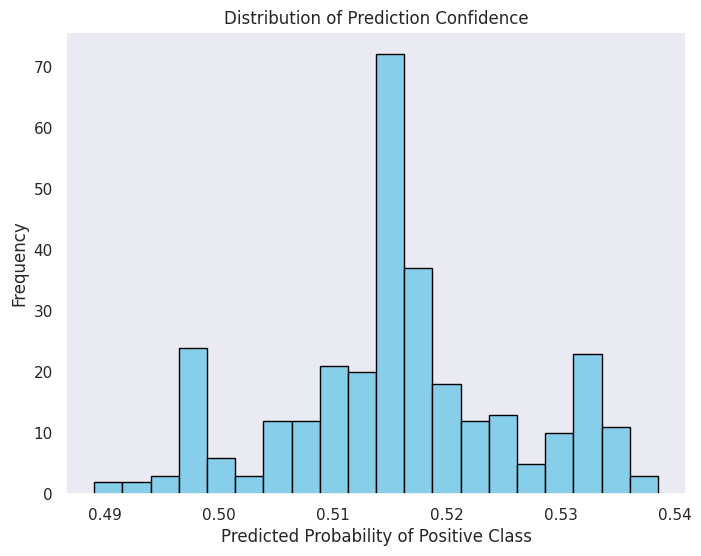

In [25]:
# 特徵重要性視覺化
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': train_x.columns,
    'Importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance in AdaBoost')
plt.xlabel('Importance Score')
plt.show()

# 學習曲線 - 觀察迭代過程中的錯誤率變化
from sklearn.model_selection import learning_curve

# 計算學習曲線
train_sizes, train_scores, test_scores = learning_curve(
    model, train_x, train_y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

# 計算平均值和標準差
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 繪製學習曲線
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves for AdaBoost')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 混淆矩陣
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(train_y, pred_y)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 預測信心分布
plt.figure(figsize=(8, 6))
pred_proba = model.predict_proba(train_x)[:, 1]
plt.hist(pred_proba, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Prediction Confidence')
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Frequency')
plt.show()

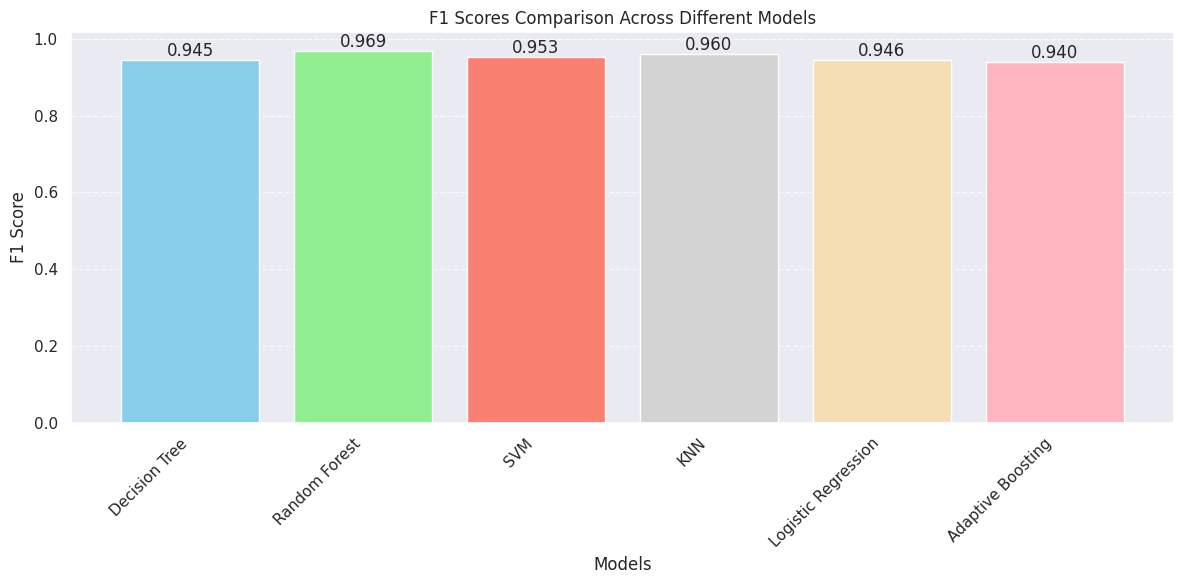


Model Rankings by F1 Score:
1. Random Forest: 0.969
2. KNN: 0.960
3. SVM: 0.953
4. Logistic Regression: 0.946
5. Decision Tree: 0.945
6. Adaptive Boosting: 0.940


In [26]:
import matplotlib.pyplot as plt

model_list = ['Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Logistic Regression', 'Adaptive Boosting']
f1_list

# 創建條形圖
plt.figure(figsize=(12, 6))
plt.bar(model_list, f1_list, color=['skyblue', 'lightgreen', 'salmon', 'lightgray', 'wheat', 'lightpink'])

# 添加數值標籤
for i, v in enumerate(f1_list):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

# 設置圖表標題和軸標籤
plt.title('F1 Scores Comparison Across Different Models')
plt.xlabel('Models')
plt.ylabel('F1 Score')

# 旋轉x軸標籤以防止重疊
plt.xticks(rotation=45, ha='right')

# 調整布局
plt.tight_layout()

# 添加網格線使圖表更易讀
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

# 印出排名
model_scores = list(zip(model_list, f1_list))
model_scores.sort(key=lambda x: x[1], reverse=True)
print("\nModel Rankings by F1 Score:")
for i, (model, score) in enumerate(model_scores, 1):
    print(f"{i}. {model}: {score:.3f}")